In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from scipy.stats import kurtosis
from sklearn import metrics

%matplotlib inline

In [2]:
cars_flag = False
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,61,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Germany,>50K
1,37,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,15024,0,40,United-States,>50K
2,50,Private,1st-4th,2,Married-spouse-absent,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
3,38,Private,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
4,56,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Black,Female,0,0,38,United-States,<=50K


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [6]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [7]:
print(X.shape)
print(y.shape)

(3000, 13)
(3000,)


In [10]:
comp = X.shape[1]
for x in range(comp):
    fast = FastICA(n_components = comp)
    x_trans = fast.fit_transform(X)
    #print(kurtosis(x_trans) * kurtosis(x_trans))
    print(x, ":", np.mean(kurtosis(x_trans) * kurtosis(x_trans)))
    

0 : 526.7501836529754
1 : 526.7504166549589
2 : 526.7575329131492
3 : 526.7498233973066
4 : 526.3577678217339
5 : 526.7532517511042
6 : 526.339569426904
7 : 526.7504876619888
8 : 526.7501558528667
9 : 526.7506893642116
10 : 526.7513008650673
11 : 526.7503351542208
12 : 526.7499547300044


In [12]:
X_new = FastICA(n_components=10).fit_transform(X)

In [13]:
vscore = []
sse = []
for i in range(1,8):
    km = KMeans(n_clusters=i, n_jobs=-1)
    km.fit(X_new)
    sse.append(km.score(X_new))
    y_pred = km.predict(X_new)
    vscore.append(metrics.v_measure_score(y, y_pred))

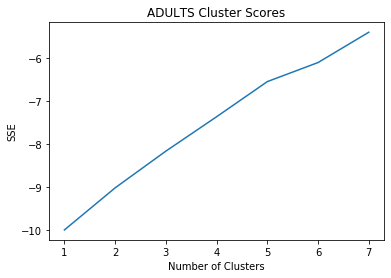

In [14]:
plt.title("ADULTS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(range(1,8), sse)

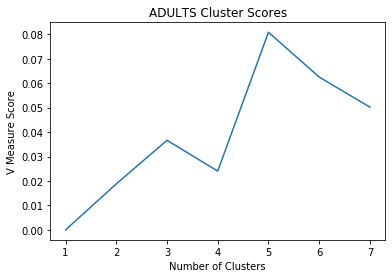

In [15]:
plt.title("ADULTS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("V Measure Score")
plt.plot(range(1,8), vscore)